In [5]:
%load_ext autoreload
%autoreload 2


import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import sourmash_utils


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
descriptions_all = pd.read_csv('/mnt/data/maca-facs-sourmash_compute_all_descriptions.csv')

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


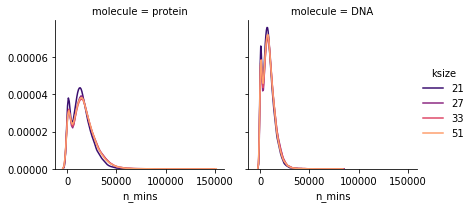

In [7]:
g = sns.FacetGrid(descriptions_all, col='molecule', hue='ksize', palette='magma')
g.map(sns.kdeplot, 'n_mins', shade=False)
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


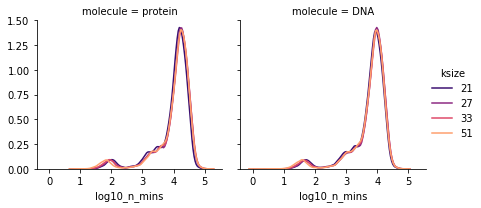

In [8]:
g = sns.FacetGrid(descriptions_all, col='molecule', hue='ksize', palette='magma')
g.map(sns.kdeplot, 'log10_n_mins', shade=False)
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


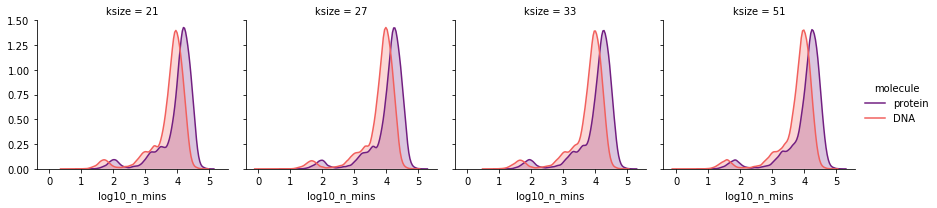

In [9]:
g = sns.FacetGrid(descriptions_all, col='ksize', hue='molecule', palette='magma')
g.map(sns.kdeplot, 'log10_n_mins', shade=True)
g.add_legend()

In [10]:
bladder_droplet = pd.read_csv('/mnt/data/10X_P4_3/descriptions.csv')
bladder_droplet.head()

[autoreload of prompt_toolkit failed: Traceback (most recent call last):
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
  File "/home/ubuntu/anaconda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/ubuntu/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ubuntu/anaconda/lib/python3.6/site-packages/prompt_toolkit/__init__.py", line 18, in <module>
    from .shortcuts import PromptSession, prompt, print_formatted_text
ImportError: cannot import name 'PromptSession'
]
[autoreload of prompt_to

,ksize,molecule,n_mins,name,log10_n_mins
0,21,protein,4331,cell_ontology_class:bladder_urothelial_cell|ti...,3.636588
1,21,DNA,2404,cell_ontology_class:bladder_urothelial_cell|ti...,3.380934
2,27,protein,4644,cell_ontology_class:bladder_urothelial_cell|ti...,3.666892
3,27,DNA,2460,cell_ontology_class:bladder_urothelial_cell|ti...,3.390935
4,33,protein,4699,cell_ontology_class:bladder_urothelial_cell|ti...,3.672005


In [11]:
bladder_droplet['method'] = '10x (droplet)'
descriptions_all['method'] = 'FACS (SmartSeq2)'

In [12]:
descriptions_concat = pd.concat([bladder_droplet, descriptions_all], ignore_index=True)
print(descriptions_concat.shape)
descriptions_concat.head()

(326692, 7)


/home/ubuntu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Unnamed: 0,ksize,log10_n_mins,method,molecule,n_mins,name
0,NaN,21,3.636588,10x (droplet),protein,4331,cell_ontology_class:bladder_urothelial_cell|ti...
1,NaN,21,3.380934,10x (droplet),DNA,2404,cell_ontology_class:bladder_urothelial_cell|ti...
2,NaN,27,3.666892,10x (droplet),protein,4644,cell_ontology_class:bladder_urothelial_cell|ti...
3,NaN,27,3.390935,10x (droplet),DNA,2460,cell_ontology_class:bladder_urothelial_cell|ti...
4,NaN,33,3.672005,10x (droplet),protein,4699,cell_ontology_class:bladder_urothelial_cell|ti...


/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


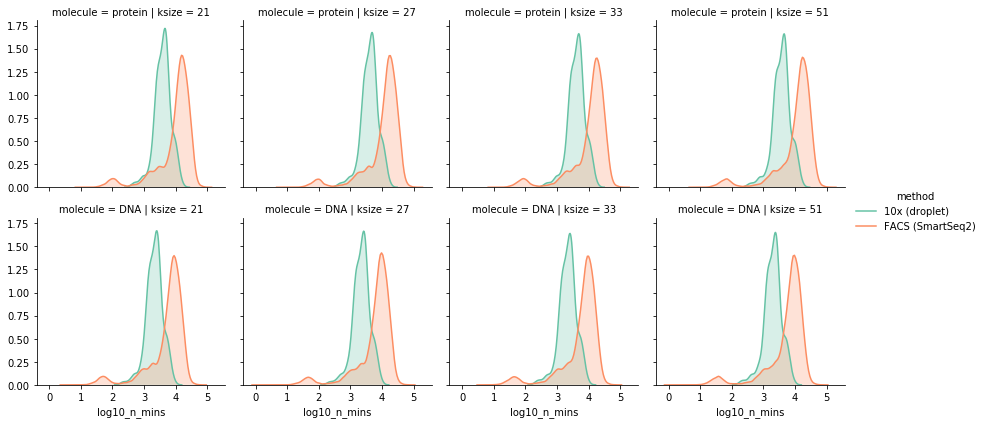

In [17]:
g = sns.FacetGrid(descriptions_concat, col='ksize',
                   row='molecule',
                   hue='method', palette='Set2')
g.map(sns.kdeplot, 'log10_n_mins', shade=True)
g.add_legend()